## Data Wrangling

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_csv = 'data/scraped_data.csv'


### Cleaning up table data

In [220]:
df = pd.read_csv(data_csv)
raw_df = df # in case this is needed for lookups

# ToDo: Maybe convert into methods to tidy up this section

# Remove duplidate rows
df = df.drop_duplicates()

# Drop some not very useful columns
df = df.drop('property_id', 1)
df = df.drop('environment', 1)
df = df.drop('page_name', 1)
df = df.drop('platform', 1)
df = df.drop('property_category', 1)
df = df.drop('seller_name', 1) # we have seller_id
df = df.drop('published_date', 1) # removing for now, since timespan is only a week
df = df.drop('facility', 1) # this has been split up into individual fiels
df = df.drop('property_type', 1)  # property_type seems to always be apartment print(df.loc[df['property_type'] != 'apartment'])
df = df.drop('lease_units', 1) # lease_units seems to always be months  print(df.loc[df['lease_units'] != 'months'])
df = df.drop('county', 1) # county seems to always be Dublin   print(df.loc[df['county'] != 'Dublin'])
df = df.drop('currency', 1) # currency seems to always be €   print(df.loc[df['county'] != '€'])
df = df.drop('longitude', 1) # doesn't seem to correlate much with price
df = df.drop('latitude', 1) # doesn't seem to correlate much with price


#show missing values in each column
print(df.isnull().sum())

# Replace area names with numbers
areas = set(df['area'])
areas_dict = {x:float(i) for i,x in enumerate(areas)}
df['area'] = df['area'].map(areas_dict)

# Replace 'seller_type' values with numbers
df['seller_type'] = df['seller_type'].map({'agent': 1.0, 'private': 0.0})

# Replace 'furnished' values with numbers
df['furnished'] = df['furnished'].map({'yes': 1.0, 'no': 0.0, 'either': 3.0})

# Replace 'open_viewing' values with numbers
df['open_viewing'] = df['open_viewing'].map({'yes': 1.0, 'no': 0.0})

# Convert int values to floats
df['no_of_photos'] = df['no_of_photos'].astype(float)
df['available_for'] = df['available_for'].astype(float)
df['price'] = df['price'].astype(float)
df['beds'] = df['beds'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)

# Replace True values with 1, False and NaN with 0
df = df.replace({True:1.0}).replace({False:0.0}).fillna(0.0)

# ToDo: available_from might be interesting after calculating timespan from ad date to available date?

print(df.info())
df.head()

property_title                0
seller_id                   248
seller_type                   0
open_viewing                  0
no_of_photos                  0
available_from                0
available_for                 0
area                          0
furnished                     0
bathrooms                     0
beds                          0
price_frequency               0
price                         0
Parking                     275
Cable Television            300
Dryer                       375
Garden / Patio / Balcony    365
Washing Machine             116
Serviced Property           657
Pets Allowed                824
Wheelchair Access           755
Central Heating             172
Microwave                   178
Smoking                     830
Dishwasher                  351
House Alarm                 639
Internet                    355
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 852
Data columns (total 27 columns):
property_title    

,property_title,seller_id,seller_type,open_viewing,no_of_photos,available_from,available_for,area,furnished,bathrooms,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
0,"1 BED, Tallaght Cross West, Tallaght, Dublin 24",9871.0,1.0,0.0,3.0,2017-10-01,12.0,7.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,"1 Palace Street, Dublin 2, Dublin 2",7549.0,1.0,0.0,6.0,2017-09-15,12.0,82.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,"10 Clarinda House, Clarinda Park West, Dun Lao...",0.0,0.0,0.0,8.0,2017-09-18,6.0,16.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,"109 Geraldstown Wood, Santry, Dublin 9",11.0,1.0,0.0,6.0,2017-09-13,12.0,81.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,"110 Old Distillery, Anne Street North, Dublin ...",181.0,1.0,0.0,11.0,2017-09-17,12.0,25.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [221]:
print ("Dimension of train data {}".format(df.shape))

Dimension of train data (842, 27)


In [222]:
df.describe()

,seller_id,seller_type,open_viewing,no_of_photos,available_for,area,furnished,bathrooms,beds,price,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,3787.058195,0.705463,0.009501,11.152019,8.853919,53.098575,1.055819,1.503563,1.856295,2202.279097,...,0.862233,0.219715,0.021378,0.103325,0.795724,0.788599,0.014252,0.583135,0.241093,0.578385
std,4115.940594,0.456105,0.097068,7.595804,5.288022,29.393651,0.460544,0.708777,1.703885,920.235720,...,0.344860,0.414300,0.144726,0.304564,0.403411,0.408545,0.118598,0.493333,0.428001,0.494111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.000000,3.000000,25.000000,1.000000,1.000000,1.000000,1500.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1206.000000,1.000000,0.000000,9.000000,12.000000,54.000000,1.000000,1.000000,2.000000,1900.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,8038.000000,1.000000,0.000000,14.000000,12.000000,82.000000,1.000000,2.000000,2.000000,2800.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,10895.000000,1.000000,1.000000,58.000000,36.000000,108.000000,3.000000,12.000000,47.000000,7000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
print(df.columns.values)

['property_title' 'seller_id' 'seller_type' 'open_viewing' 'no_of_photos'
 'available_from' 'available_for' 'area' 'furnished' 'bathrooms' 'beds'
 'price_frequency' 'price' 'Parking' 'Cable Television' 'Dryer'
 'Garden / Patio / Balcony' 'Washing Machine' 'Serviced Property'
 'Pets Allowed' 'Wheelchair Access' 'Central Heating' 'Microwave' 'Smoking'
 'Dishwasher' 'House Alarm' 'Internet']


### Splitting into Weekly and Monthly Priced Dataframes

In [226]:
df_weekly_rates = df.loc[df['price_frequency'] == 'weekly']
df_weekly_rates = df_weekly_rates.drop('price_frequency', 1)
print(df_weekly_rates.shape)

df_monthly_rates = df.loc[df['price_frequency'] == 'monthly']
df_monthly_rates = df_monthly_rates.drop('price_frequency', 1)

# There seems to be an ad with 47 beds for 750/months. removing this
df_monthly_rates = df_monthly_rates[df_monthly_rates.beds < 20]
print(df_monthly_rates.shape)

(156, 26)
(685, 26)


## Continuing with only monthly priced data for now

#### Histograms

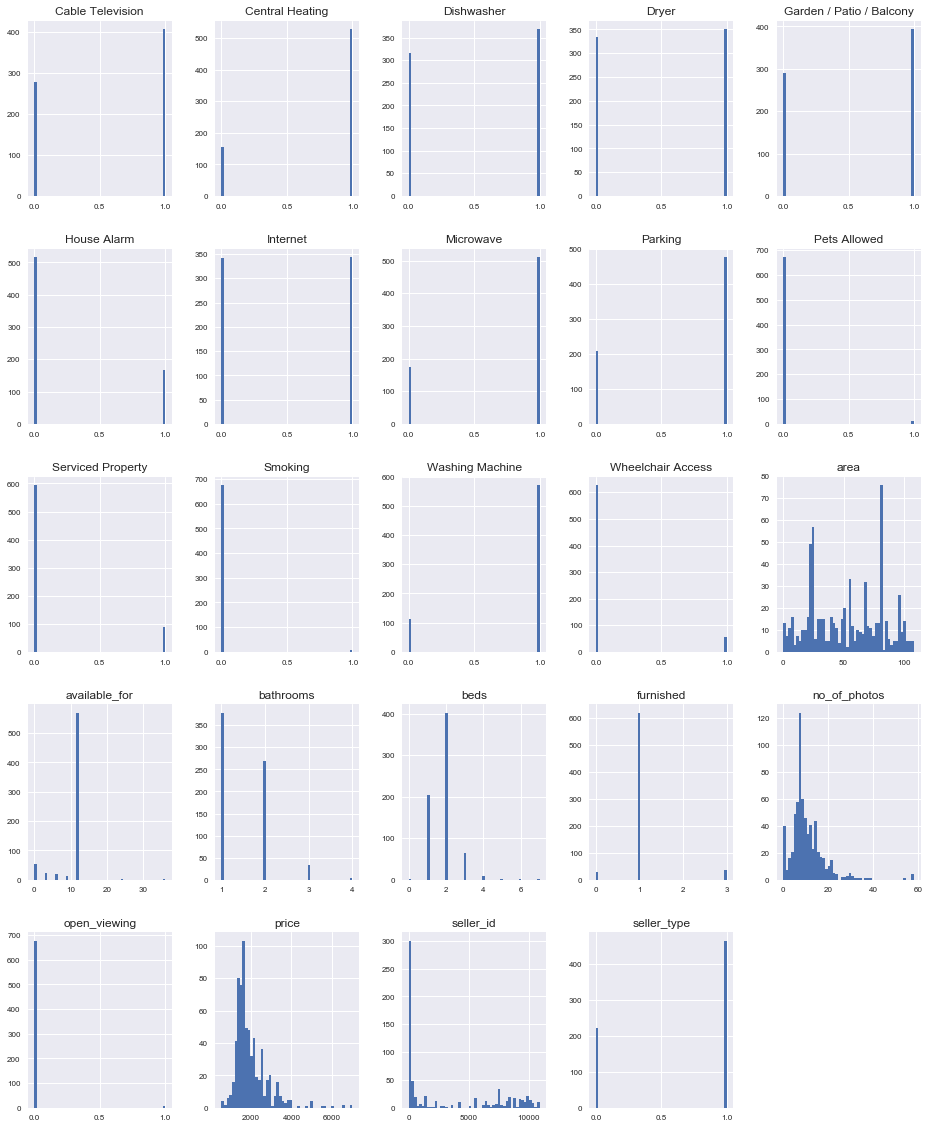

In [227]:
df_monthly_rates.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Correlations

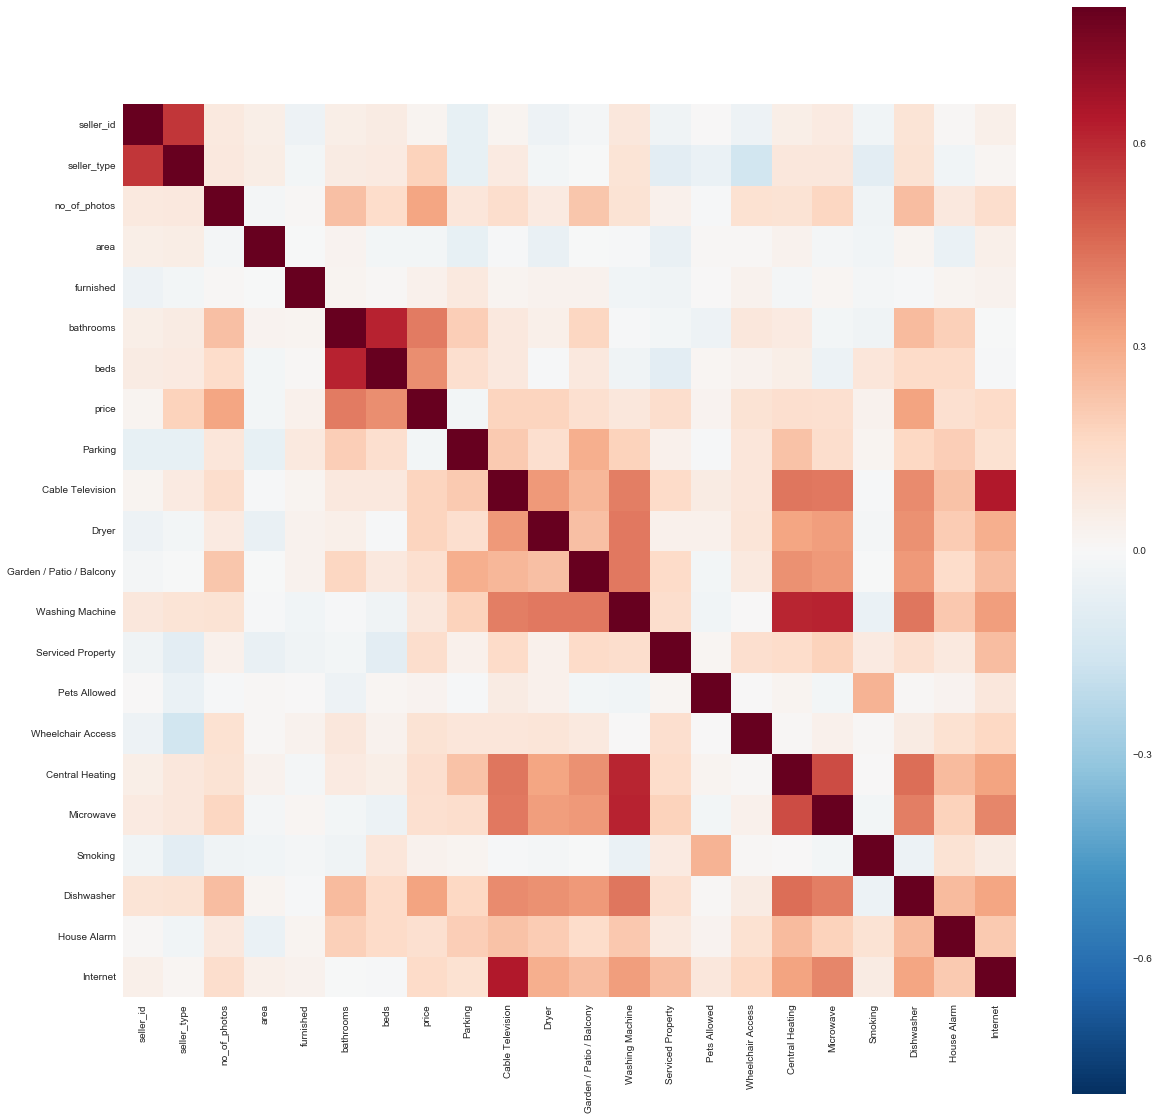

In [229]:
#correlation matrix
corrmat = df_monthly_rates.drop('available_for', 1).drop('open_viewing', 1).corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

# plt.figure(figsize=(10,10))
# foo = sns.heatmap(corrmat.corr(), vmax=0.8, square=True, annot=True)

Features that correlate most with the monthly rent price are number of no_of_photos, beds and bathrooms, as well as 'dishwasher'...

In [232]:
df_monthly_rates['price'].describe()

count     685.000000
mean     1987.732847
std       822.627803
min       550.000000
25%      1500.000000
50%      1750.000000
75%      2300.000000
max      7000.000000
Name: price, dtype: float64